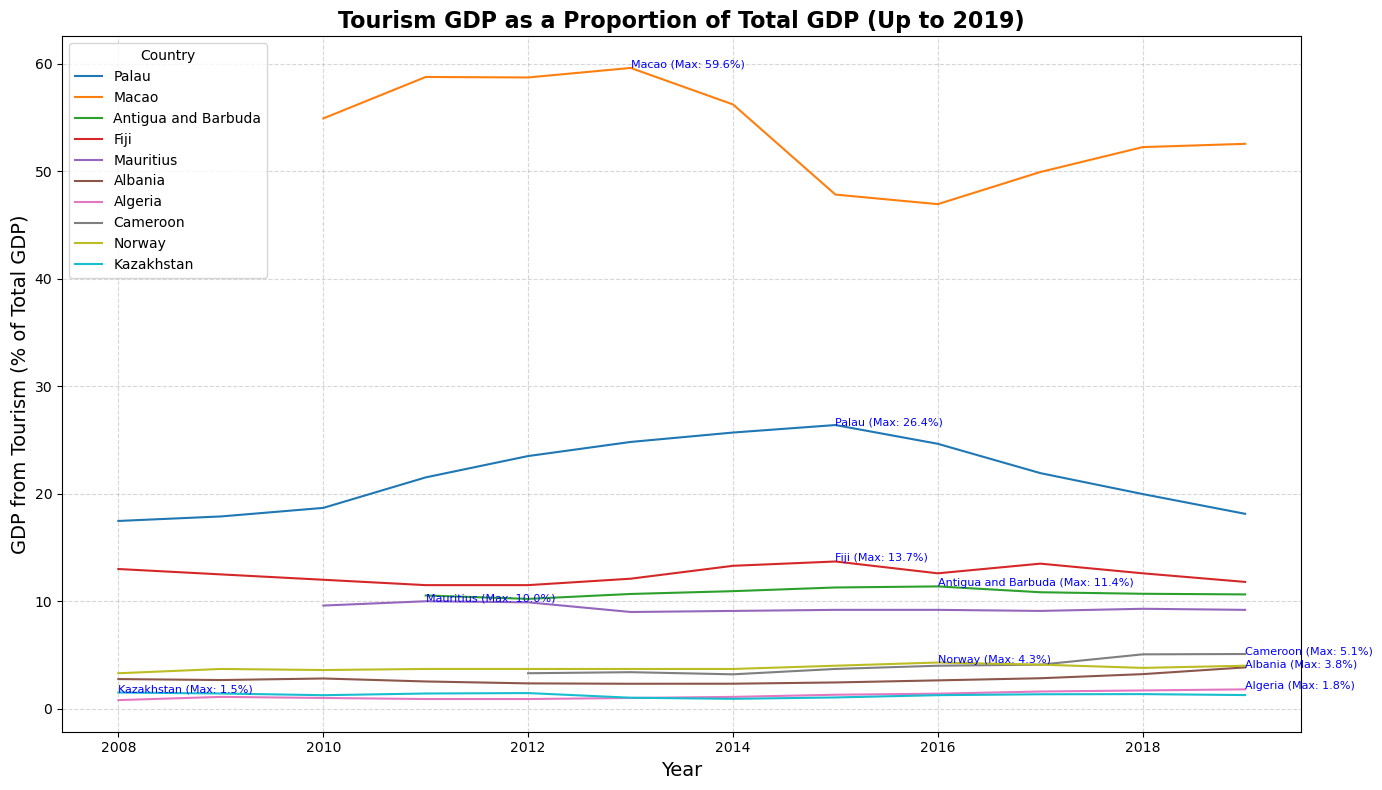

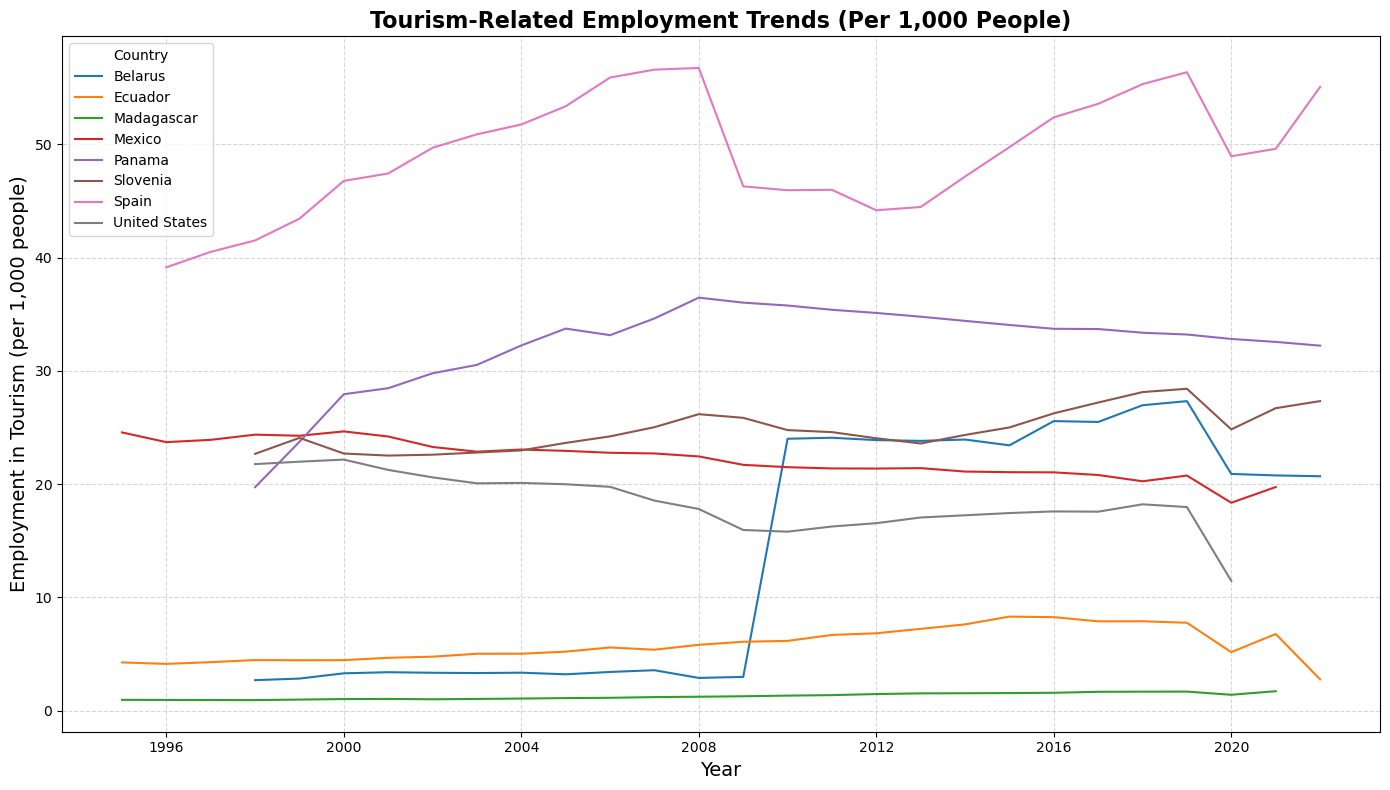

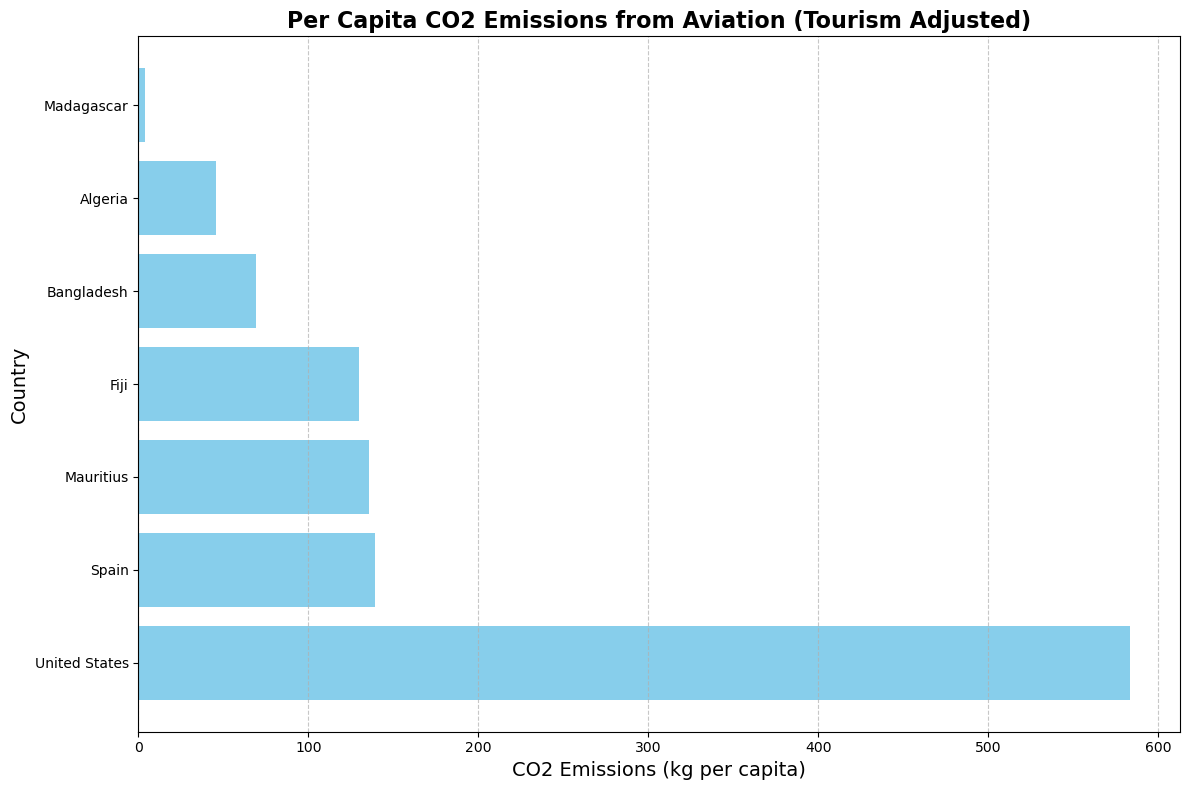

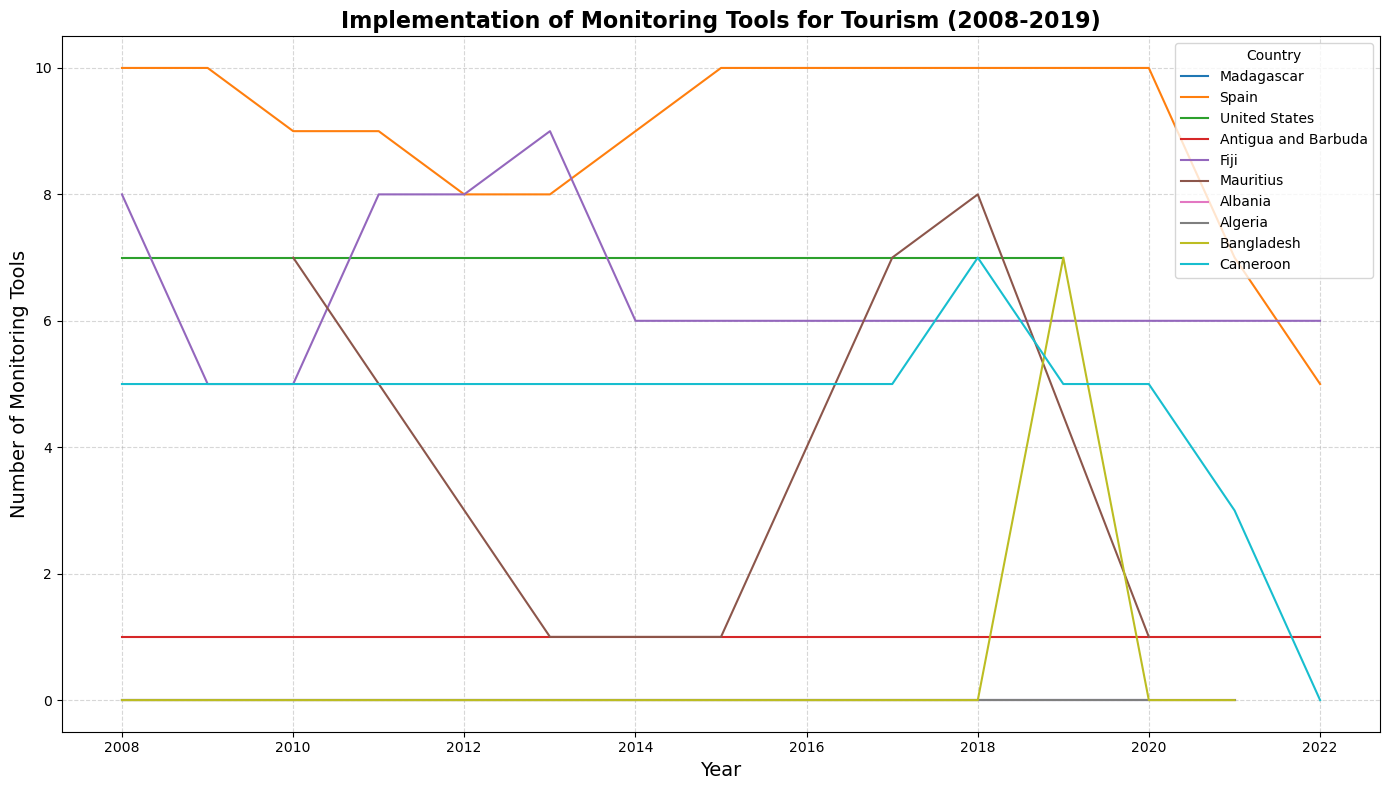

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Define file paths
file_paths = {
    "tourism_gdp": "tourism-gdp-proportion-of-total-gdp.csv",
    "employment_in_tourism": "number-of-individuals-employed-in-tourism-related-industries-per-1000-people.csv",
    "co2_aviation": "per-capita-co2-aviation-adjusted.csv",
    "monitoring_tools": "implementation-of-tools-to-monitor-economic-and-environmental-tourism.csv",
}

# Load datasets
datasets = {name: pd.read_csv(path) for name, path in file_paths.items()}

# Ensure proper formatting for Year columns
for dataset in datasets.values():
    dataset["Year"] = pd.to_datetime(dataset["Year"], format="%Y", errors="coerce")

# Assign datasets for clarity
tourism_gdp = datasets["tourism_gdp"]
employment_in_tourism = datasets["employment_in_tourism"]
co2_aviation = datasets["co2_aviation"]
monitoring_tools = datasets["monitoring_tools"]

# Selected country lists
selected_countries_gdp = [
    "Palau", "Macao", "Antigua and Barbuda", "Fiji", "Mauritius", 
    "Albania", "Algeria", "Cameroon", "Norway", "Kazakhstan"
]

selected_countries_employment = [
    "Belarus", "Ecuador", "Madagascar", "Mexico", "Panama", 
    "Slovenia", "Spain", "United States"
]

selected_countries_co2 = [
    "Madagascar", "Algeria", "Bangladesh", "Fiji", "Mauritius", "Spain", "United States"
]

selected_countries_monitoring = [
    "Madagascar", "Spain", "United States", "Antigua and Barbuda",
    "Fiji", "Mauritius", "Albania", "Algeria", "Bangladesh", "Cameroon"
]

# Plot 1: Tourism GDP as a Proportion of Total GDP (Up to 2019)
plt.figure(figsize=(14, 8))
for country in selected_countries_gdp:
    data = tourism_gdp[(tourism_gdp["Entity"] == country) & (tourism_gdp["Year"].dt.year <= 2019)]
    plt.plot(data["Year"], data["GDP from tourism as a share of total GDP"], label=country)
    if not data.empty:
        max_value = data["GDP from tourism as a share of total GDP"].max()
        max_year = data.loc[data["GDP from tourism as a share of total GDP"].idxmax(), "Year"]
        plt.text(max_year, max_value, f"{country} (Max: {max_value:.1f}%)", fontsize=8, color='blue')
plt.title("Tourism GDP as a Proportion of Total GDP (Up to 2019)", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("GDP from Tourism (% of Total GDP)", fontsize=14)
plt.legend(title="Country")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Plot 2: Tourism-Related Employment Trends
plt.figure(figsize=(14, 8))
for country in selected_countries_employment:
    data = employment_in_tourism[employment_in_tourism["Entity"] == country]
    plt.plot(data["Year"], data["Total employment in tourism industries per 1,000 people"], label=country)
plt.title("Tourism-Related Employment Trends (Per 1,000 People)", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Employment in Tourism (per 1,000 people)", fontsize=14)
plt.legend(title="Country")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Plot 3: Per Capita CO2 from Aviation (Sorted in Descending Order)
plt.figure(figsize=(12, 8))
bar_data = co2_aviation[co2_aviation["Entity"].isin(selected_countries_co2)]
bar_data = bar_data.sort_values(by="Per capita aviation CO2 - adjusted", ascending=False)
plt.barh(bar_data["Entity"], bar_data["Per capita aviation CO2 - adjusted"], color='skyblue')
plt.title("Per Capita CO2 Emissions from Aviation (Tourism Adjusted)", fontsize=16, fontweight='bold')
plt.xlabel("CO2 Emissions (kg per capita)", fontsize=14)
plt.ylabel("Country", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot 4: Implementation of Monitoring Tools for Tourism
plt.figure(figsize=(14, 8))
for country in selected_countries_monitoring:
    data = monitoring_tools[monitoring_tools["Entity"] == country]
    plt.plot(data["Year"], data["Total number of tables"], label=country)
plt.title("Implementation of Monitoring Tools for Tourism (2008-2019)", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Monitoring Tools", fontsize=14)
plt.legend(title="Country")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


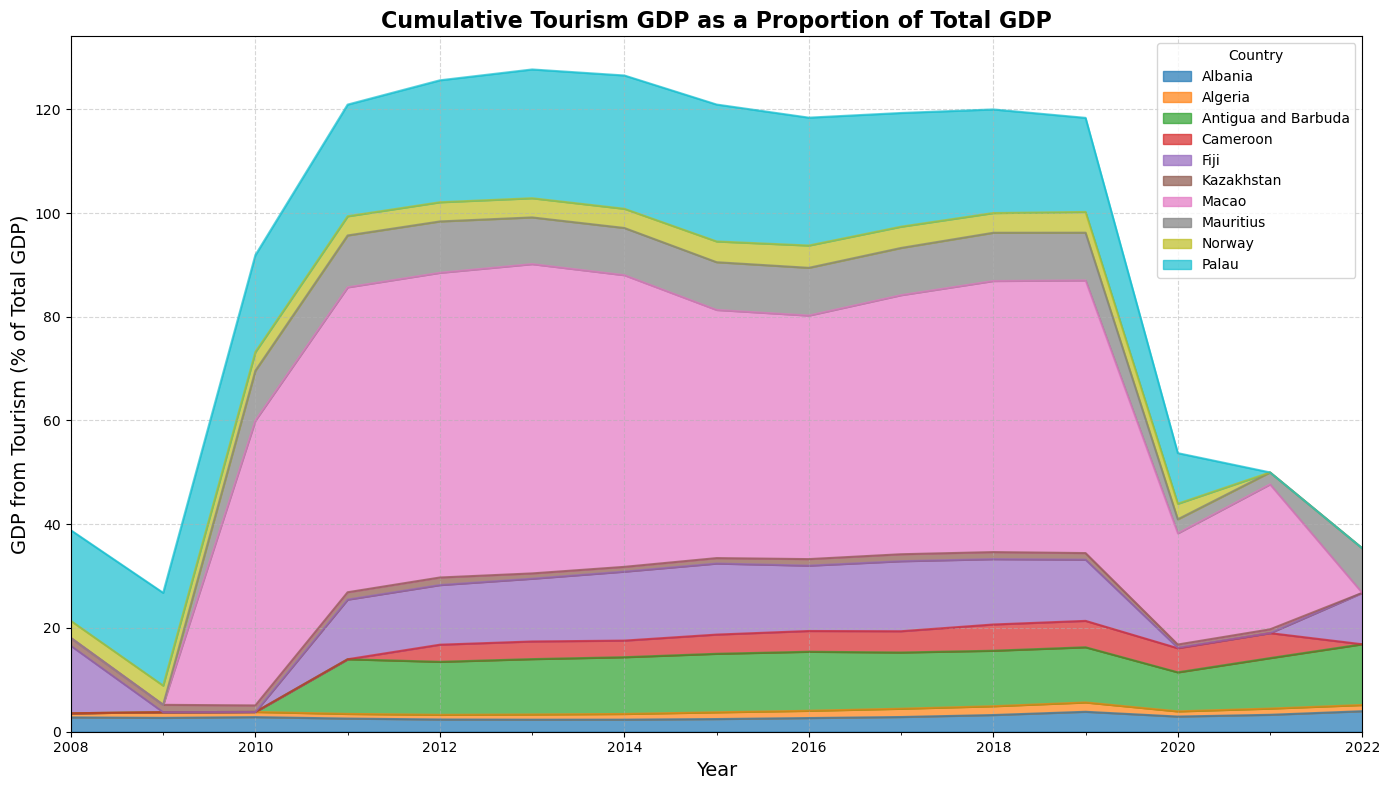

In [8]:
# Filter negative values
stacked_data = tourism_gdp[tourism_gdp["Entity"].isin(selected_countries_gdp)]
stacked_data = stacked_data[stacked_data["GDP from tourism as a share of total GDP"] >= 0]

# Pivot the dataset for the area plot
stacked_data_pivot = stacked_data.pivot(index="Year", columns="Entity", values="GDP from tourism as a share of total GDP").fillna(0)

# Plot the stacked area plot
stacked_data_pivot.plot.area(figsize=(14, 8), alpha=0.7)
plt.title("Cumulative Tourism GDP as a Proportion of Total GDP", fontsize=16, fontweight="bold")
plt.xlabel("Year", fontsize=14)
plt.ylabel("GDP from Tourism (% of Total GDP)", fontsize=14)
plt.legend(title="Country")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

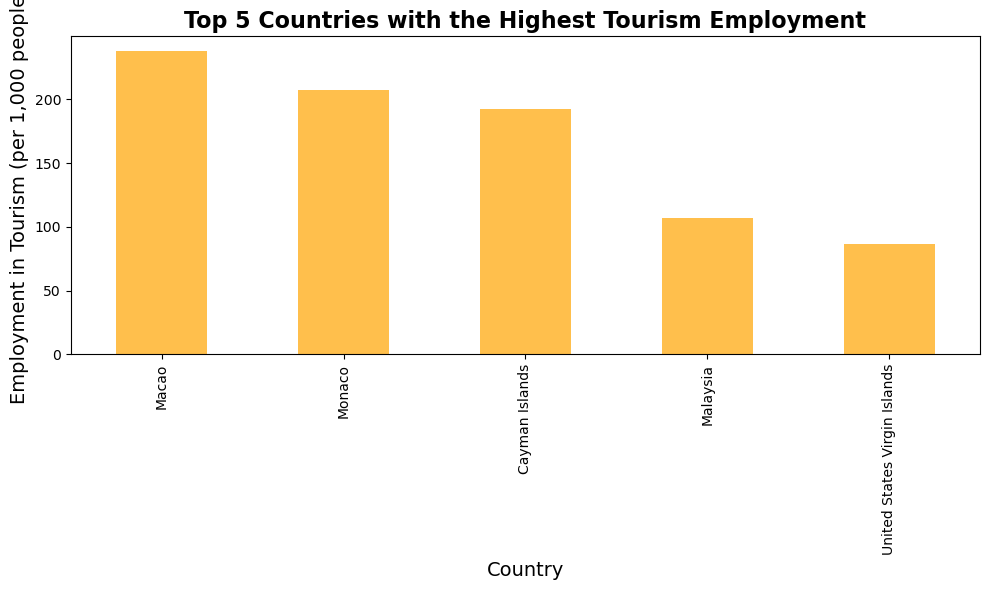

In [6]:
top_countries = employment_in_tourism.groupby("Entity")["Total employment in tourism industries per 1,000 people"].max().nlargest(5)
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color='orange', alpha=0.7)
plt.title("Top 5 Countries with the Highest Tourism Employment", fontsize=16, fontweight='bold')
plt.xlabel("Country", fontsize=14)
plt.ylabel("Employment in Tourism (per 1,000 people)", fontsize=14)
plt.tight_layout()
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_7764\2772444649.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data["Bubble_Size"] = selected_data["GDP from tourism as a share of total GDP"] * 10  # Adjust size for visibility


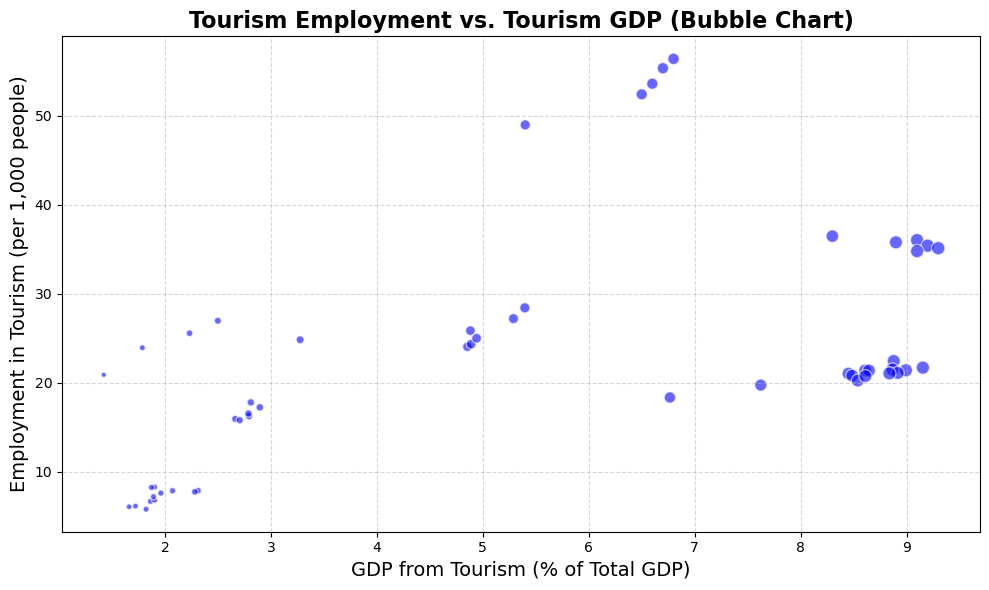

In [10]:
plt.figure(figsize=(10, 6))
selected_data["Bubble_Size"] = selected_data["GDP from tourism as a share of total GDP"] * 10  # Adjust size for visibility
plt.scatter(
    selected_data["GDP from tourism as a share of total GDP"],
    selected_data["Total employment in tourism industries per 1,000 people"],
    s=selected_data["Bubble_Size"],  # Bubble sizes
    c='blue', alpha=0.6, edgecolors='w'
)
plt.title("Tourism Employment vs. Tourism GDP (Bubble Chart)", fontsize=16, fontweight='bold')
plt.xlabel("GDP from Tourism (% of Total GDP)", fontsize=14)
plt.ylabel("Employment in Tourism (per 1,000 people)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

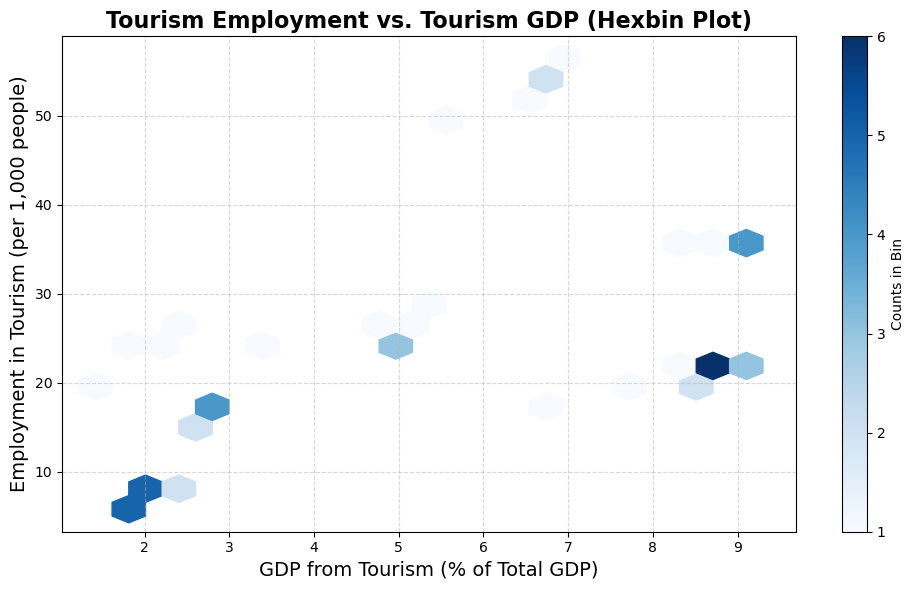

In [11]:
plt.figure(figsize=(10, 6))
plt.hexbin(
    selected_data["GDP from tourism as a share of total GDP"],
    selected_data["Total employment in tourism industries per 1,000 people"],
    gridsize=20, cmap='Blues', mincnt=1
)
plt.colorbar(label="Counts in Bin")
plt.title("Tourism Employment vs. Tourism GDP (Hexbin Plot)", fontsize=16, fontweight='bold')
plt.xlabel("GDP from Tourism (% of Total GDP)", fontsize=14)
plt.ylabel("Employment in Tourism (per 1,000 people)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

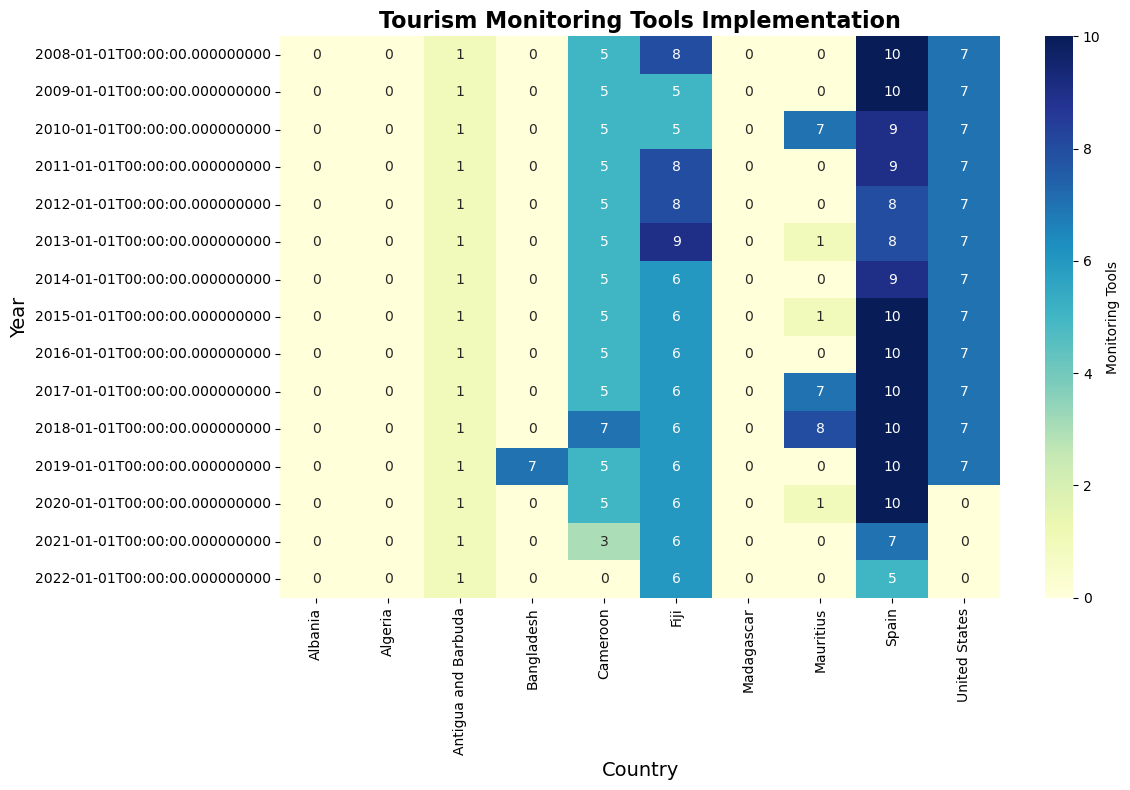

In [5]:
import seaborn as sns

heatmap_data = monitoring_tools[monitoring_tools["Entity"].isin(selected_countries_monitoring)]
heatmap_data_pivot = heatmap_data.pivot(index="Year", columns="Entity", values="Total number of tables").fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data_pivot, cmap="YlGnBu", annot=True, fmt=".0f", cbar_kws={"label": "Monitoring Tools"})
plt.title("Tourism Monitoring Tools Implementation", fontsize=16, fontweight='bold')
plt.xlabel("Country", fontsize=14)
plt.ylabel("Year", fontsize=14)
plt.tight_layout()
plt.show()